# Практика

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [12]:
# ваш код тут
# например вот такое распределение https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cosine.html#scipy.stats.cosine

rayleigh_sv = sts.rayleigh(0.5) # Возьмем рапределение Рэлея с параметром 0.5
sample = rayleigh_sv.rvs(1000)

In [13]:
sample.dtype

dtype('float64')

In [14]:
real_mean = rayleigh_sv.mean() # настоящее среднее случайной величины

In [15]:
real_var = rayleigh_sv.var() # настоящая дисперсия случайной величины

In [16]:
print(real_mean, real_var)

1.7533141373155001 0.42920367320510344


### Постройте гистограмму выборки и теоретическую плотность распределения

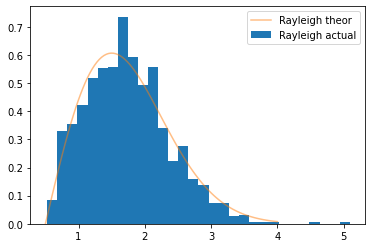

In [17]:
# ваш код тут
plt.hist(sample, 30, density=True, label="Rayleigh actual")
x = np.linspace(0.5,4,100)
pdf = rayleigh_sv.pdf(x)
plt.plot(x, pdf, label='Rayleigh theor', alpha=0.5)
plt.legend();

In [18]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

1.737174353520358
0.3986730910989237


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

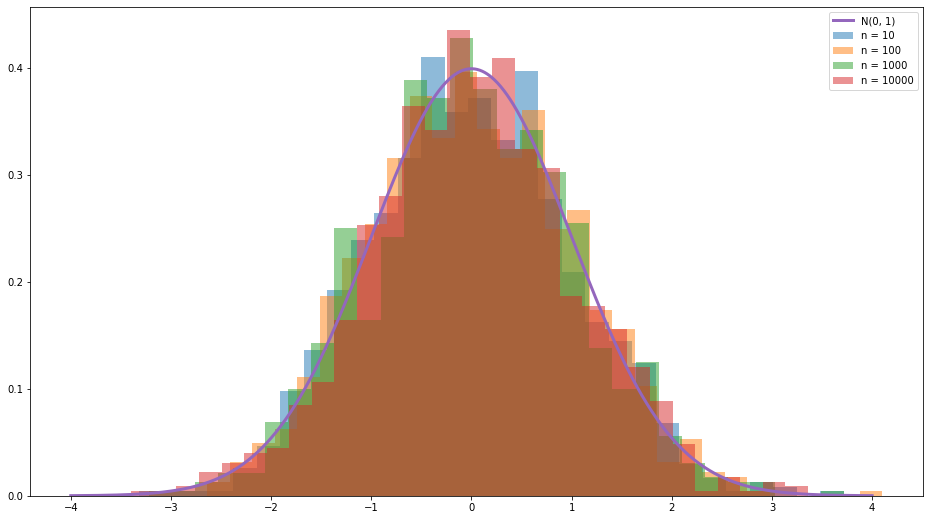

In [38]:
# ваш код тут
plt.figure(figsize=(16,9))
mu, sigma = rayleigh_sv.mean(), rayleigh_sv.std()
# сгенерируем много выборочных средних
for N in [10, 100, 1000, 10000]:
    means = []
    for i in range(1000):
        means.append(np.mean(rayleigh_sv.rvs(N)))
    
    approximation = [math.sqrt(N)*(mean-mu)/sigma for mean in means]
    plt.hist(approximation, bins=30, density=True, label='n = ' + str(N), alpha=0.5)
    
x = np.linspace(-4,4,1000)
norm_rv = sts.norm(0,1)
plt.plot(x,norm_rv.pdf(x), linewidth=3, label='N(0, 1)')

plt.legend()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

In [ ]:
# чем больше  размер генерируемой выборки, тем точнее получаеся нормальная апрокмимация

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('telecom_churn.csv')
df_stay = df[(df['churn'] == False)]
df_out = df[(df['churn'] == True)]

In [106]:
N = 30
# сгенерируем много выборочных средних
means_stay = []
means_out = []
for i in range(1000):
    means_stay.append(np.mean(np.random.choice(df_stay['total day calls'], N)))
    means_out.append(np.mean(np.random.choice(df_out['total day calls'], N)))
    
means_stay = np.array(means_stay).astype(np.float32)
means_out = np.array(means_out).astype(np.float32)

In [107]:
print("Доверительный интервал для среднего по ЦПТ (не ушел): [{}, {}] ".format(
    np.mean(means_stay) - 1.96 * (np.std(means_stay, ddof=1)/np.sqrt(means_stay.shape[0])), np.mean(means_stay) + 1.96 * (np.std(means_stay, ddof=1)/np.sqrt(means_stay.shape[0])) 
))
print("Доверительный интервал для среднего по ЦПТ (ушел): [{}, {}] ".format(
    np.mean(means_out) - 1.96 * (np.std(means_out, ddof=1)/np.sqrt(means_out.shape[0])), np.mean(means_out) + 1.96 * (np.std(means_out, ddof=1)/np.sqrt(means_out.shape[0])) 
))

Доверительный интервал для среднего по ЦПТ (не ушел): [100.02914869893664, 100.49198472391492] 
Доверительный интервал для среднего по ЦПТ (ушел): [101.35525483250817, 101.85461455225746] 


In [108]:
from statsmodels.stats.weightstats import _zconfint_generic

print("95%% confidence interval churn=False", _zconfint_generic(np.mean(means_stay), 
                                                    np.std(means_stay, ddof=1)/np.sqrt(means_stay.shape[0]), 
                                                    0.05, 'two-sided'))
print("95%% confidence interval churn=True", _zconfint_generic(np.mean(means_out), 
                                                    np.std(means_out, ddof=1)/np.sqrt(means_out.shape[0]), 
                                                    0.05, 'two-sided'))

95%% confidence interval churn=False (100.02915295129692, 100.49198047155464)
95%% confidence interval churn=True (101.35525942043418, 101.85460996433144)
